# Fitting Logistic Growth Curves

---
In this tutorial we will cover how to fit growth curves on data from PhenoTypic. For growth curves you'll typically want to use metrics of size: "Shape_Area" or "Intensity_IntegratedIntensity".

Size Metric Comparison:
| Metric                          | Pros                                         | Cons |
|:--------------------------------|:---------------------------------------------|:-----|
| "Shape_Area"                    | Simple to set up<br> Captures lateral growth | Misses Vertical Growth |
| "Intensity_IntegratedIntensity" | Captures lateral and vertical growth         | Requires color correction if there's significant color drift or lots of color variation between colonies |


Phenotypic uses the following form of the logistic formula:

$N(t) = K / (1 + [(K - N0) / N0] * exp(-r * t))$



In this tutorial we use


In [1]:
import phenotypic as pht

meas = pht.data.load_area_meas()
meas

,Metadata_Condition,Metadata_Media,Metadata_Set,Metadata_Replicate,Metadata_Time,Metadata_Strain,Metadata_FileName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,...,Shape_Solidity,Shape_Extent,Shape_BboxArea,Shape_MajorAxisLength,Shape_MinorAxisLength,Shape_Compactness,Shape_Orientation,Metadata_StrainID,CorrectedCarryingCapacity_Area,Metadata_Dataset
0,30C,S,3,4,24,CBS11445,30C_2_3S_4,14,263.025755,327.103517,...,12.617915,0.798024,2530.0,55.294623,46.583553,1.117302,-0.084676,220,4183.333333,S 30C
1,30C,S,3,5,24,CBS11445,30C_2_3S_5,14,309.120466,291.332736,...,13.242579,0.796078,2805.0,55.711088,51.195661,1.126356,-0.081185,220,3225.333333,S 30C
2,30C,S,3,6,24,CBS11445,30C_2_3S_6,13,312.525658,262.907288,...,13.463688,0.786102,2950.0,58.771804,50.375258,1.140002,0.063090,220,2984.666667,S 30C
3,30C,S,3,12,24,CBS11445,30C_2_3S_12,16,296.079598,305.151655,...,13.756844,0.778031,3068.0,58.834119,51.712095,1.100419,0.148893,220,3074.666667,S 30C
4,30C,S,3,8,24,CBS11445,30C_2_3S_8,14,318.208931,260.158426,...,12.146975,0.784731,2397.0,51.565716,46.664778,1.142966,0.142562,220,2988.333333,S 30C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,30C,S,2,11,72,CBS1554,30C_6_2S_11,63,973.962591,1966.926790,...,14.046096,0.822906,3021.0,59.215028,53.562770,1.081169,-0.078068,173,3029.000000,S 30C
125,30C,S,2,10,72,CBS1554,30C_6_2S_10,60,946.880000,1962.843303,...,14.761408,0.796784,3420.0,60.763463,57.145007,1.104857,0.078933,173,2936.333333,S 30C
126,30C,S,2,12,72,CBS1554,30C_6_2S_12,65,898.070659,1904.361913,...,13.589731,0.827451,2805.0,56.244849,52.675338,1.105180,0.021614,173,2955.666667,S 30C
127,30C,S,2,9,72,CBS1554,30C_6_2S_9,59,930.611318,1922.992554,...,14.617362,0.813939,3300.0,61.027435,56.182194,1.092438,-0.303707,173,3020.666667,S 30C


## Fit model

In [2]:
log_model = pht.analysis.LogGrowthModel(on='Shape_Area', groupby=['Metadata_Strain'],
                                        agg_func='mean',
                                        time_label='Metadata_Time',
                                        n_jobs=-1)
model_fit = log_model.analyze(meas)
model_fit

,Metadata_Strain,LogGrowthModel_r,LogGrowthModel_K,LogGrowthModel_N0,LogGrowthModel_d(N)/dt,LogGrowthModel_Kmax,LogGrowthModel_NumSamples,LogGrowthModel_OptimizerLoss,LogGrowthModel_OptimizerStatus,LogGrowthModel_MAE,LogGrowthModel_MSE,LogGrowthModel_RMSE
0,CBS11445,0.166216,2714.816006,137.615755,112.811294,3018.454545,5,125037.153875,2,183.049261,42415.380501,205.949947
1,CBS1553,0.167559,2305.175801,115.487192,96.563185,2472.666667,5,69568.900184,2,137.793562,22388.740201,149.628674
2,CBS1554,0.146019,2378.764322,144.697351,86.836165,2552.125000,5,73161.488307,2,138.704721,22429.910846,149.766187


## Display results

(<Figure size 600x400 with 1 Axes>, <Axes: >)

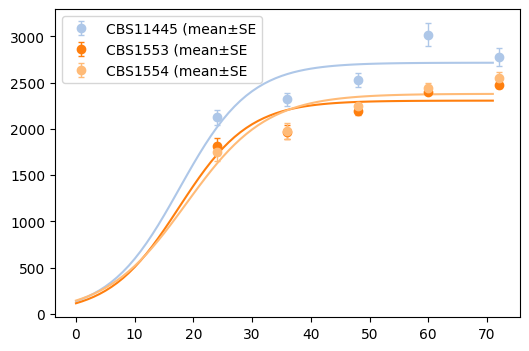

In [3]:
log_model.show()

(<Figure size 600x400 with 1 Axes>, <Axes: >)

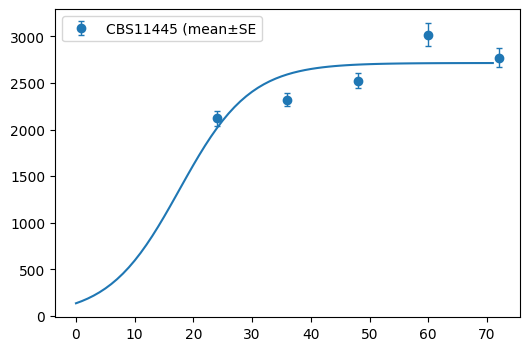

In [4]:
log_model.show(criteria={'Metadata_Strain': ['CBS11445']})